## Import modules and data

In [1]:
# https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../data/AAL.csv')
df.head()

,Date,Close
0,7/2/2018,38.360001
1,7/3/2018,37.750000
2,7/5/2018,37.990002
3,7/6/2018,38.090000
4,7/9/2018,39.310001


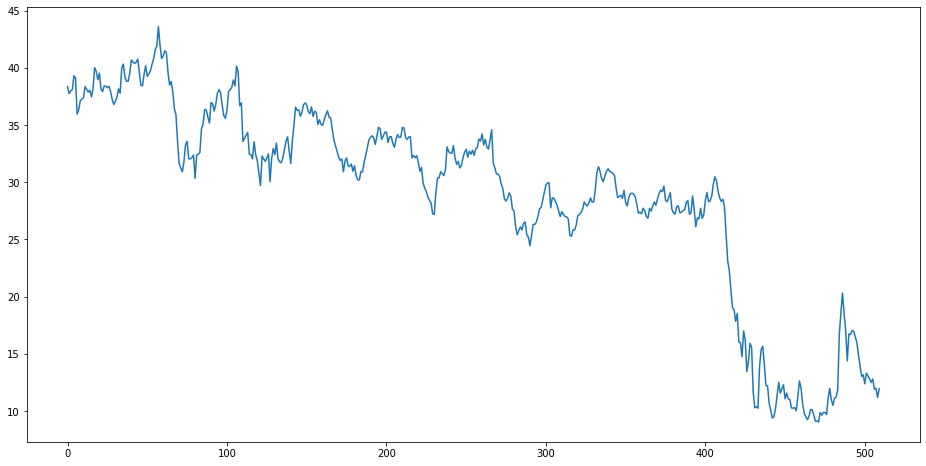

In [3]:
# What historical stock prices actually looked like
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [4]:
model_data = df.iloc[0:370,:]
model_data.head()

,Date,Close
0,2018-07-02,38.360001
1,2018-07-03,37.750000
2,2018-07-05,37.990002
3,2018-07-06,38.090000
4,2018-07-09,39.310001


## Create and train the model

In [5]:
# Use train, test, split to training and testing data
from sklearn.model_selection import train_test_split

input_data = []
output_data = []

for i in range(60,len(model_data)):
    input_data.append(model_data.loc[i-60:i,"Close"])
    output_data.append(model_data.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [7]:
# Reshape training data to fit model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [8]:
# Fit the model
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(X_train_scaled,y_train_scaled,epochs=5,batch_size=32,verbose=2)

Epoch 1/5
8/8 - 1s - loss: 0.0744
Epoch 2/5
8/8 - 1s - loss: 0.0212
Epoch 3/5
8/8 - 1s - loss: 0.0195
Epoch 4/5
8/8 - 1s - loss: 0.0139
Epoch 5/5
8/8 - 2s - loss: 0.0123


## Test the model

In [9]:
# Reshape testing data to fit model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [10]:
# Evaluate the model using the testing data
model_loss = lstm_model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}")

3/3 - 0s - loss: 0.0122
Loss: 0.012170959264039993


In [11]:
# Predict y values for test data to see how closely they match actual values
predicted_closing_price=lstm_model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[29.82058 ],
       [35.957966],
       [33.046215],
       [32.182465],
       [31.665861],
       [31.48467 ],
       [34.13329 ],
       [31.25203 ],
       [28.897831],
       [35.304108],
       [31.397316],
       [31.539154],
       [29.203142],
       [28.344362],
       [30.336971],
       [29.68198 ],
       [37.338123],
       [32.752583],
       [31.280788],
       [30.160599],
       [31.37136 ],
       [33.881226],
       [32.467636],
       [32.339756],
       [31.425497],
       [29.301699],
       [32.32858 ],
       [33.787434],
       [29.50943 ],
       [28.742907],
       [33.542915],
       [37.65743 ],
       [31.934488],
       [27.66053 ],
       [34.222218],
       [33.931347],
       [35.113052],
       [32.153526],
       [31.699411],
       [31.26985 ],
       [34.74604 ],
       [31.489967],
       [30.232172],
       [28.619423],
       [29.069525],
       [31.648214],
       [27.951565],
       [36.80531 ],
       [30.080736],
       [31.525421],


In [12]:
predictions = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [13]:
test_data = pd.DataFrame({"Predicted": predictions})
test_data

,Predicted
0,29.820580
1,35.957966
2,33.046215
3,32.182465
4,31.665861
...,...
73,33.054352
74,31.403723
75,27.638628
76,33.342815


In [14]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[29.290001],
       [33.549999],
       [33.540001],
       [30.780001],
       [35.080002],
       [32.040001],
       [36.      ],
       [31.57    ],
       [28.639999],
       [40.16    ],
       [32.099998],
       [29.92    ],
       [28.74    ],
       [27.92    ],
       [28.66    ],
       [28.23    ],
       [38.799999],
       [33.990002],
       [29.5     ],
       [28.17    ],
       [31.799999],
       [35.689999],
       [33.75    ],
       [34.59    ],
       [32.84    ],
       [30.379999],
       [30.92    ],
       [36.860001],
       [30.290001],
       [27.190001],
       [33.23    ],
       [39.610001],
       [34.98    ],
       [26.26    ],
       [36.59    ],
       [35.490002],
       [38.419998],
       [32.040001],
       [33.029999],
       [30.959999],
       [38.099998],
       [34.66    ],
       [32.68    ],
       [29.950001],
       [27.290001],
       [32.939999],
       [26.42    ],
       [36.439999],
       [28.860001],
       [33.580002],


In [15]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
test_data["Actual"] = actuals
test_data

,Predicted,Actual
0,29.820580,29.290001
1,35.957966,33.549999
2,33.046215,33.540001
3,32.182465,30.780001
4,31.665861,35.080002
...,...,...
73,33.054352,36.970001
74,31.403723,32.459999
75,27.638628,27.360001
76,33.342815,32.040001


In [16]:
lstm_model.save("../models/AAL_model.h5")

## Use the model to predict stock prices 

In [17]:
inputs = []

for i in range(370,len(df)):
    inputs.append(df.loc[i-60:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [18]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [19]:
forecasted_closing_price = lstm_model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[28.43563 ],
       [28.523632],
       [28.631565],
       [28.751158],
       [28.88736 ],
       [28.971626],
       [29.023363],
       [29.059723],
       [29.106577],
       [29.094517],
       [29.039585],
       [28.940563],
       [28.867413],
       [28.802704],
       [28.725147],
       [28.638168],
       [28.57557 ],
       [28.51865 ],
       [28.496042],
       [28.505209],
       [28.489286],
       [28.461039],
       [28.48484 ],
       [28.495956],
       [28.440897],
       [28.371073],
       [28.29866 ],
       [28.272001],
       [28.229042],
       [28.184494],
       [28.198925],
       [28.293198],
       [28.363499],
       [28.440578],
       [28.531542],
       [28.67599 ],
       [28.86164 ],
       [29.04827 ],
       [29.182718],
       [29.27226 ],
       [29.300991],
       [29.30403 ],
       [29.263948],
       [29.105747],
       [28.789911],
       [28.370047],
       [27.846375],
       [27.237665],
       [26.599684],
       [25.95071 ],


In [20]:
forecasts = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [21]:
forecast_data = df.iloc[370:,:]
forecast_data

,Date,Close
370,2019-12-19,28.549999
371,2019-12-20,29.040001
372,2019-12-23,29.299999
373,2019-12-24,29.180000
374,2019-12-26,29.670000
...,...,...
505,2020-07-06,12.800000
506,2020-07-07,11.910000
507,2020-07-08,11.990000
508,2020-07-09,11.180000


In [22]:
forecast_data["Prediction"] = forecasts
forecast_data

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
370,2019-12-19,28.549999,28.435631
371,2019-12-20,29.040001,28.523632
372,2019-12-23,29.299999,28.631565
373,2019-12-24,29.180000,28.751158
374,2019-12-26,29.670000,28.887360
...,...,...,...
505,2020-07-06,12.800000,20.066687
506,2020-07-07,11.910000,19.925562
507,2020-07-08,11.990000,19.801723
508,2020-07-09,11.180000,19.663252


In [23]:
forecast_data.to_csv("../data/predictions/AAL.csv")

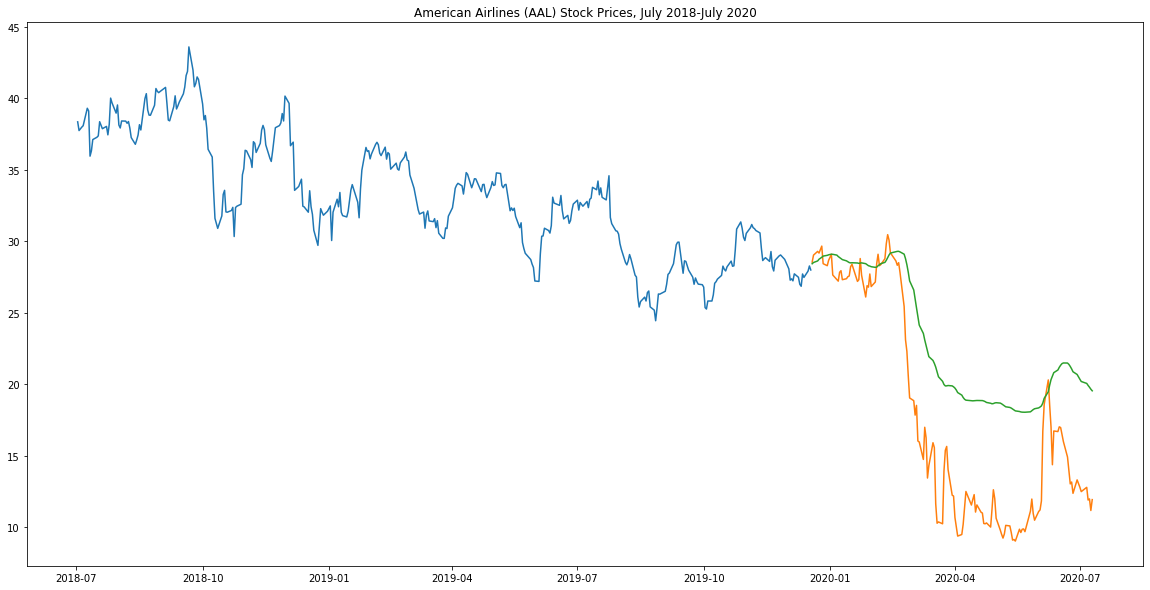

In [26]:
model_data = model_data.set_index("Date")
forecast_data = forecast_data.set_index("Date")
plt.plot(model_data["Close"])
plt.plot(forecast_data[['Close',"Prediction"]])
plt.title("American Airlines (AAL) Stock Prices, July 2018-July 2020")
plt.savefig("../charts/AAL.png")